# Notebook 1: EDA

In [1]:
import kaggle
import os
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Use Kaggle API to automatically download dataset.
# obs: more info in https://www.kaggle.com/docs/api
os.system('kaggle datasets download -d uciml/default-of-credit-card-clients-dataset -p ./data --unzip')

# source: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

0

## Extract

In [3]:
df = pd.read_csv('data/UCI_Credit_card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Data Quality

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
# Missing values?
df.loc[df.isna().any(axis=1)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


In [6]:
# Duplicates?
df.loc[df.duplicated()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


In [7]:
# Unique ID?
df['ID'].value_counts(ascending=False).head()

ID
1        1
19997    1
20009    1
20008    1
20007    1
Name: count, dtype: int64

In [8]:
# LIMIT_BAL > 0?
# If float do not have decimals, it will be turned into int.
def remove_decimals(value):
    if value.is_integer():
        return int(value)
    else:
        return value

df['LIMIT_BAL'] = df['LIMIT_BAL'].apply(remove_decimals)
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [9]:
# Binary default.payment.next.month?
df['default.payment.next.month'].value_counts(dropna=False)

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

In [10]:
# Binary SEX?
df['SEX'].value_counts(dropna=False)

SEX
2    18112
1    11888
Name: count, dtype: int64

In [11]:
# Fixed categories for EDUCATION?
df['EDUCATION'].value_counts(dropna=False)

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [12]:
# Fixed categories for MARRIAGE?
df['MARRIAGE'].value_counts(dropna=False)

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [13]:
# 0 < AGE < 200?
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [14]:
# PAY_0 to PAY_6 between -1 and 1 to 9?
list_pay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pd.unique(df[list_pay].values.ravel())

array([ 2, -1, -2,  0,  1,  3,  4,  5,  6,  8,  7], dtype=int64)

In [15]:
# BILL_AMT is between 0 and +inf?
list_bill = [i for i in list(df.columns) if 'BILL_AMT' in i]
df[list_bill].describe().round(1)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,51223.3,49179.1,47013.2,43262.9,40311.4,38871.8
std,73635.9,71173.8,69349.4,64332.9,60797.2,59554.1
min,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0
25%,3558.8,2984.8,2666.2,2326.8,1763.0,1256.0
50%,22381.5,21200.0,20088.5,19052.0,18104.5,17071.0
75%,67091.0,64006.2,60164.8,54506.0,50190.5,49198.2
max,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0


In [16]:
# positive PAY_AMT?
list_pay_amt = [i for i in list(df.columns) if 'PAY_AMT' in i]
df[list_pay_amt].describe().round(1)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,5663.6,5921.2,5225.7,4826.1,4799.4,5215.5
std,16563.3,23040.9,17607.0,15666.2,15278.3,17777.5
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,1000.0,833.0,390.0,296.0,252.5,117.8
50%,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0
75%,5006.0,5000.0,4505.0,4013.2,4031.5,4000.0
max,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0


### Checklist

Interpretation
- ✔️: OK
- ❌: problems

General checklist:
- missing values: ✔️
- datatype: ✔️
- duplicates: ✔️

Specific checklist:
- Is ID unique? ✔️
- Is LIMIT_BAL positive? ✔️
- Is default.payment.next.month binary? ✔️
- Is SEX binary? ✔️
- Is EDUCATION between 1 to 6? ❌
- Is MARRIAGE between 1 to 3? ❌
- Is AGE between 0 to 200? ✔️
- Is PAY between -1 or between 1 and 9? ❌
- Is BILL_AMT between -inf to +inf?* ✔️
- Is PAY_AMY positive? ✔️

*obs: negative billing values could mean refund.*



### Corrections

In [17]:
# EDUCATION irregular values (0) analysis.
df_check = df[['ID', 'EDUCATION', 'default.payment.next.month']].copy(deep=True)
df_check['dummy_EDUCATION_0'] = np.where(df_check['EDUCATION'] != 0, 0, 1)
display(pd.pivot_table(df_check, index='dummy_EDUCATION_0', columns='default.payment.next.month', values='ID', aggfunc='count', fill_value=0, margins=True))

print('''
In terms of credit default, rows with EDUCATION = 0 do not appear to behave differently from EDUCATION != 0.
Unfortunately, we have frequency 0 in the contingency matrix, which could jeopardize Chi Square hypothesis test results.
Since we are talking about only 14 rows, the simplest solution will be to filter them.
''')

print(df.shape)
df = df.loc[df['EDUCATION'] != 0]
print(df.shape)

default.payment.next.month,0,1,All
dummy_EDUCATION_0,,,
0,23350,6636,29986
1,14,0,14
All,23364,6636,30000



In terms of credit default, rows with EDUCATION = 0 do not appear to behave differently from EDUCATION != 0.
Unfortunately, we have frequency 0 in the contingency matrix, which could jeopardize Chi Square hypothesis test results.
Since we are talking about only 14 rows, the simplest solution will be to filter them.

(30000, 25)
(29986, 25)


In [18]:
# MARRIAGE irregular values (0) analysis.
df_check = df[['ID', 'MARRIAGE', 'default.payment.next.month']].copy(deep=True)
df_check['dummy_MARRIAGE_0'] = np.where(df_check['MARRIAGE'] != 0, 0, 1)
df_check = pd.pivot_table(df_check, index='dummy_MARRIAGE_0', columns='default.payment.next.month', values='ID', aggfunc='count', fill_value=0, margins=False)
#df_check = pd.pivot_table(df_check, index='MARRIAGE', columns='default.payment.next.month', values='ID', aggfunc='count', fill_value=0, margins=False)
display(df_check)

st, p = stats.fisher_exact(df_check.values, alternative='two-sided')
print(st, p)
if p < 0.05:
    print('Reject null hypothesis: samples are statistically divergent')
else:
    print('Non-reject null hypothesis: samples are not statistically different')

print('''
Since the hypothesis test provided evidence of relevancy for MARRIAGE=0, this category will not be filtered.
''')

default.payment.next.month,0,1
dummy_MARRIAGE_0,,
0,23301,6631
1,49,5


0.3585662888289081 0.020809819077447007
Reject null hypothesis: samples are statistically divergent

Since the hypothesis test provided evidence of relevancy for MARRIAGE=0, this category will not be filtered.



In [19]:
# Repayment status (PAY_) variable analysis.
print('While the data dictionary states number between [-1, +1:+9], we are facing values from [-2:-1, +1:+8]')

list_pay_status = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df_check = pd.melt(df, id_vars='ID', value_vars=list_pay_status)
df_check = pd.pivot_table(df_check, index='variable', columns='value', values='ID', aggfunc='count', fill_value=0).reset_index()
display(df_check)

#df_check['target=0'] = df_check[[-2, -1, 0]].sum(axis=1)
#df_check['target=1'] = df_check[list(range(1, 9))].sum(axis=1)
#display(df_check)

While the data dictionary states number between [-1, +1:+9], we are facing values from [-2:-1, +1:+8]


value,variable,-2,-1,0,1,2,3,4,5,6,7,8
0,PAY_0,2756,5682,14733,3685,2667,322,76,26,11,9,19
1,PAY_2,3778,6044,15726,28,3927,326,99,25,12,20,1
2,PAY_3,4081,5931,15762,4,3818,240,76,21,23,27,3
3,PAY_4,4344,5681,16452,2,3158,180,69,35,5,58,2
4,PAY_5,4542,5532,16944,0,2626,178,84,17,4,58,1
5,PAY_6,4889,5733,16285,0,2766,184,49,13,19,46,2


In [20]:
print('''
According to author itself, the dictinary is not up to date for these variables. The undocument categories for PAY_ variables are:
-2: No consumption of credit.
0: The use of revolving credit

source: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608
      
Therefore, it is possible to consider [-2, -1, 0] to non credit default and [1:8] to credit default.
''')


According to author itself, the dictinary is not up to date for these variables. The undocument categories for PAY_ variables are:
-2: No consumption of credit.
0: The use of revolving credit

source: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608
      
Therefore, it is possible to consider [-2, -1, 0] to non credit default and [1:8] to credit default.



## Split train test dataset

In [21]:
# Split conditional do target.
X = df.drop(columns='default.payment.next.month')
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52, shuffle=True, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23988, 24) (5998, 24) (23988,) (5998,)


In [22]:
# Export.
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

## EDA

### General

In [23]:
# Use exclusively train data in EDA to avoid data leakage.
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
264,265,80000,2,1,2,37,-1,-1,-1,-1,...,188.0,1644.0,16872.0,258.0,5995.0,188.0,1644.0,16872.0,4000.0,0
11594,11595,190000,2,2,1,33,0,0,0,-2,...,0.0,0.0,0.0,2200.0,0.0,0.0,0.0,0.0,0.0,0
27779,27780,230000,2,1,2,24,-1,0,0,0,...,0.0,2000.0,987.0,7000.0,1000.0,0.0,2000.0,987.0,1951.0,0
380,381,130000,2,2,2,29,0,0,0,0,...,72367.0,73875.0,75355.0,4200.0,2575.0,2600.0,2674.0,2701.0,5750.0,0
25599,25600,20000,2,3,2,45,-1,-1,-1,-1,...,370.0,780.0,390.0,350.0,400.0,400.0,800.0,0.0,390.0,0


### Categorical

In [25]:
# Create new features based of repayment status:

# Feature 1: do not use credit frequently.
def feat_eng_low_credit_usage(df):
    # Arbitrary rule: historic of maximum 1 usage of credit during the last 6 months.
    df['dummy_low_credit_usage'] = np.where(df['PAY_0'] == -2, 1, 0)
    df['dummy_low_credit_usage'] = np.where(df['PAY_2'] == -2, df['dummy_low_credit_usage'] + 1, df['dummy_low_credit_usage'])
    df['dummy_low_credit_usage'] = np.where(df['PAY_3'] == -2, df['dummy_low_credit_usage'] + 1, df['dummy_low_credit_usage'])
    df['dummy_low_credit_usage'] = np.where(df['PAY_4'] == -2, df['dummy_low_credit_usage'] + 1, df['dummy_low_credit_usage'])
    df['dummy_low_credit_usage'] = np.where(df['PAY_5'] == -2, df['dummy_low_credit_usage'] + 1, df['dummy_low_credit_usage'])
    df['dummy_low_credit_usage'] = np.where(df['PAY_6'] == -2, df['dummy_low_credit_usage'] + 1, df['dummy_low_credit_usage'])
    df['dummy_low_credit_usage'] = np.where(df['dummy_low_credit_usage'] >= 5, 1, 0)
    return df

# Feature 2: have historic of high tardiness in payment.
def feat_eng_high_tardiness(df):
    # Arbitrary rule: historic of at least 1 payment delay superior to 7 months (inclusive) during the last 6 months.
    df['dummy_high_tardiness'] = np.where(df['PAY_0'] >= 7, 1, 0)
    df['dummy_high_tardiness'] = np.where(df['PAY_2'] >= 7, 1, df['dummy_high_tardiness'])
    df['dummy_high_tardiness'] = np.where(df['PAY_3'] >= 7, 1, df['dummy_high_tardiness'])
    df['dummy_high_tardiness'] = np.where(df['PAY_4'] >= 7, 1, df['dummy_high_tardiness'])
    df['dummy_high_tardiness'] = np.where(df['PAY_5'] >= 7, 1, df['dummy_high_tardiness'])
    df['dummy_high_tardiness'] = np.where(df['PAY_6'] >= 7, 1, df['dummy_high_tardiness'])
    return df

# Feature 3: have historic of moderate tardiness in payment.
def feat_eng_moderate_tardiness(df):
    # Arbitrary rule: historic of at least 1 payment delay between 4 to 6 months (inclusive) during the last 6 months.
    df['dummy_moderate_tardiness'] = np.where(df['PAY_0'].between(4, 6), 1, 0)
    df['dummy_moderate_tardiness'] = np.where(df['PAY_2'].between(4, 6), 1, df['dummy_moderate_tardiness'])
    df['dummy_moderate_tardiness'] = np.where(df['PAY_3'].between(4, 6), 1, df['dummy_moderate_tardiness'])
    df['dummy_moderate_tardiness'] = np.where(df['PAY_4'].between(4, 6), 1, df['dummy_moderate_tardiness'])
    df['dummy_moderate_tardiness'] = np.where(df['PAY_5'].between(4, 6), 1, df['dummy_moderate_tardiness'])
    df['dummy_moderate_tardiness'] = np.where(df['PAY_6'].between(4, 6), 1, df['dummy_moderate_tardiness'])
    return df

# Feature 4: have historic of small tardiness in payment.
def feat_eng_low_tardiness(df):
    # Arbitrary rule: historic of a lest 1 payment delay between 1 to 3 months (inclusive) during the last 6 months.
    df['dummy_low_tardiness'] = np.where(df['PAY_0'].between(1, 3), 1, 0)
    df['dummy_low_tardiness'] = np.where(df['PAY_2'].between(1, 3), 1, df['dummy_low_tardiness'])
    df['dummy_low_tardiness'] = np.where(df['PAY_3'].between(1, 3), 1, df['dummy_low_tardiness'])
    df['dummy_low_tardiness'] = np.where(df['PAY_4'].between(1, 3), 1, df['dummy_low_tardiness'])
    df['dummy_low_tardiness'] = np.where(df['PAY_5'].between(1, 3), 1, df['dummy_low_tardiness'])
    df['dummy_low_tardiness'] = np.where(df['PAY_6'].between(1, 3), 1, df['dummy_low_tardiness'])
    return df
    
# Feature 5: have historic of frequent tardiness in payment.
def feat_eng_payment_delay(df):
    # Arbitrary rule: historic of at least 5 payment delays during the last 6 months.
    df['dummy_payment_delay'] = np.where(df['PAY_0'] >= 1, 1, 0)
    df['dummy_payment_delay'] = np.where(df['PAY_2'] >= 1, df['dummy_payment_delay'] + 1, df['dummy_payment_delay'])
    df['dummy_payment_delay'] = np.where(df['PAY_3'] >= 1, df['dummy_payment_delay'] + 1, df['dummy_payment_delay'])
    df['dummy_payment_delay'] = np.where(df['PAY_4'] >= 1, df['dummy_payment_delay'] + 1, df['dummy_payment_delay'])
    df['dummy_payment_delay'] = np.where(df['PAY_5'] >= 1, df['dummy_payment_delay'] + 1, df['dummy_payment_delay'])
    df['dummy_payment_delay'] = np.where(df['PAY_6'] >= 1, df['dummy_payment_delay'] + 1, df['dummy_payment_delay'])
    df['dummy_payment_delay'] = np.where(df['dummy_payment_delay'] >= 5, 1, 0)
    return df

# Feature 6: have recent behaviour of payment delay.
def feat_eng_recent_delay(df):
    # Arbitrary rule: historic of 3 payment delay during last 3 months.
    df['dummy_recent_payment_delay'] = np.where((df['PAY_0'] >= 1) &
                                                (df['PAY_2'] >= 1) &
                                                (df['PAY_3'] >= 1), 1, 0)
    return df


# Run feature engineering.
df_train = feat_eng_low_credit_usage(df_train)
df_train = feat_eng_high_tardiness(df_train)
df_train = feat_eng_moderate_tardiness(df_train)
df_train = feat_eng_low_tardiness(df_train)
df_train = feat_eng_payment_delay(df_train)
df_train = feat_eng_recent_delay(df_train)

#df_train['dummy_low_credit_usage'].value_counts()
#df_train['dummy_high_tardiness'].value_counts()
#df_train['dummy_moderate_tardiness'].value_counts()
#df_train['dummy_low_tardiness'].value_counts()
#df_train['dummy_payment_delay'].value_counts()
#df_train['dummy_recent_payment_delay'].value_counts()

In [26]:
# Check.
df_train.loc[df_train['dummy_recent_payment_delay'] > 0].head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,dummy_low_credit_usage,dummy_high_tardiness,dummy_moderate_tardiness,dummy_low_tardiness,dummy_payment_delay,dummy_recent_payment_delay
25821,25822,210000,2,1,2,34,1,2,2,-1,...,150.0,546.0,0.0,1,0,0,0,1,0,1
2640,2641,80000,2,3,1,35,2,2,2,2,...,0.0,3043.0,2625.0,1,0,0,0,1,1,1
17386,17387,20000,2,2,2,48,1,3,2,2,...,1000.0,0.0,792.0,1,0,0,0,1,1,1


c:\Users\Rafael\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


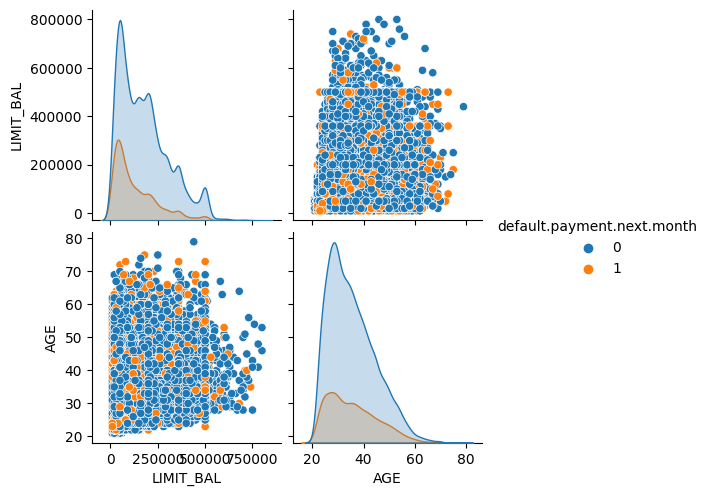

In [27]:
# Numerical variables analysis: no category
list_num_g1 = ['LIMIT_BAL', 'AGE', 'default.payment.next.month']
sns.pairplot(df_train[list_num_g1], hue='default.payment.next.month')

In [28]:
# Different ages have different spending habits?
def feat_eng_age_decade(df):
    df['dummy_20s'] = np.where(df['AGE'] <= 29, 1, 0)
    df['dummy_30s'] = np.where(df['AGE'].between(30, 39), 1, 0)
    df['dummy_40s'] = np.where(df['AGE'].between(40, 49), 1, 0)
    df['dummy_50s'] = np.where(df['AGE'].between(50, 59), 1, 0)
    df['dummy_60s'] = np.where(df['AGE'].between(60, 69), 1, 0)
    df['dummy_over_70s'] = np.where(df['AGE'] >= 70, 1, 0)
    return df

df_check = feat_eng_age_decade(df_train)

In [29]:
# Create a methodology for exploring relevancy of categorical features.

# Calculate Cramér' V.
def cramer_v(st, f_obs):
    # In this case, we will always have degree of freedom = 1.
    v = (st / np.sum(f_obs)) ** 0.5

    # Interpretation of V.
    if (v <= 0.2):
        print(f'Cramér V: {round(v, 3)} (weak)')
    elif (v <= 0.4):
        print(f'Cramér V: {round(v, 3)} (moderate)')
    elif (v <= 0.8):
        print(f'Cramér V: {round(v, 3)} (strong)')
    else:
        print(f'Cramér V: {round(v, 3)} (really strong)')
    # obs: reference obtained from scientific source: https://ekja.org/journal/view.php?doi=10.4097/kjae.2016.69.6.555
    return v


# Create prioru and post hoc chisquare test for categorical variables.
def categorical_variable_hypothesis_test(df, variable, target, pvalue):
    df = pd.pivot_table(
        df,
        index=variable,
        columns=target,
        values='ID',
        aggfunc='count'
    ).reset_index()
    # Priori test: how relevant is the relation between variable vs target?
    f_obs = np.array(df[1])

    avg_target = df[1].sum() / df[[0, 1]].sum().sum()
    f_exp = np.array((df[[0, 1]].sum(axis=1) * avg_target))#.round(0).astype(int))
    
    #print(f'''
    #Observed frequency: {np.array(f_obs).round(0).astype(int)}
    #Expected frequency: {np.array(f_exp).round(0).astype(int)}
    #''')

    st, p = stats.chisquare(f_obs, f_exp)
    #cramer_v(st, f_obs)

    if p < pvalue:
        # Result 1: variable is relevant.
        print(f'Priori test: variable {variable} is relevant (p-value: {p}).')
        cramer_v(st, f_obs)
        print('')
        
        # Post Hoc test: how relevant is the relation between each category vs target?
        list_cat = df[variable].unique()
        n_cat = len(list_cat)
        list_v = [] 

        if n_cat > 2:
            # Hypothesis test for each category.
            for cat in list_cat:
                f_obs = [df.loc[df[variable] == cat, 1].values[0],
                        df.loc[df[variable] != cat, 1].sum()]
                f_exp = [df.loc[df[variable] == cat][[0, 1]].sum(axis=1).values[0],
                        df.loc[df[variable] != cat][[0, 1]].sum().sum()]
                f_exp = (np.array(f_exp) * avg_target)#.round(0).astype(int)

                # Warning: frequency < 13
                if (np.array(f_obs).min() < 13) | (np.array(f_exp).min() < 13):
                    print('*** Warning: Chi Square test with frequency smaller than 13 can lead to wrongful conclusions. ***')

                #print(f'''
                #Observed frequency: {np.array(f_obs).round(0).astype(int)}
                #Expected frequency: {np.array(f_exp).round(0).astype(int)}
                #''')

                st, p = stats.chisquare(f_obs, f_exp)
                
                # Bonferroni correction.
                if p < (pvalue / n_cat):
                    print(f'Post hoc test: category {cat} is relevant (p-value: {p}).')
                else:
                    print(f'Post hoc test: category {cat} is not relevant (p-value: {p}).')

                v = cramer_v(st, f_obs)
                list_v.append(v)
            print('')

        return list_cat, list_v 

    else:
        # Result 1: variable is relevant
        print(f'Priori test: variable {variable} is not relevant (p-value: {p}).')
        cramer_v(st, f_obs)
        print('')
        # End of analysis.
    
    return None, None

'''
#(check)
_, _ = categorical_variable_hypothesis_test(
    df=df_train,
    variable='MARRIAGE',
    target='default.payment.next.month',
    pvalue=0.05)
'''

"\n#(check)\n_, _ = categorical_variable_hypothesis_test(\n    df=df_train,\n    variable='MARRIAGE',\n    target='default.payment.next.month',\n    pvalue=0.05)\n"

In [32]:
# What categorical are relevant?
list_cat_var = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'dummy_low_credit_usage',
    'dummy_high_tardiness',
    'dummy_moderate_tardiness',
    'dummy_low_tardiness',
    'dummy_payment_delay',
    'dummy_recent_payment_delay',
    'dummy_20s',
    'dummy_30s',
    'dummy_40s',
    'dummy_50s',
    'dummy_60s',
    'dummy_over_70s'
    ]

for i in list_cat_var:
    _, _ = categorical_variable_hypothesis_test(
        df=df_train,
        variable=i,
        target='default.payment.next.month',
        pvalue=0.05
        )

Priori test: variable SEX is relevant (p-value: 1.6554147179518566e-08).
Cramér V: 0.077 (weak)

Priori test: variable EDUCATION is relevant (p-value: 8.586414313929436e-21).
Cramér V: 0.14 (weak)

Post hoc test: category 1 is relevant (p-value: 9.059995182197944e-13).
Cramér V: 0.098 (weak)
Post hoc test: category 2 is relevant (p-value: 8.325039642586049e-06).
Cramér V: 0.061 (weak)
Post hoc test: category 3 is relevant (p-value: 1.954959717056244e-07).
Cramér V: 0.071 (weak)
*** Warning: Chi Square test with frequency smaller than 13 can lead to wrongful conclusions. ***
Post hoc test: category 4 is relevant (p-value: 0.000822344428582072).
Cramér V: 0.046 (weak)
Post hoc test: category 5 is relevant (p-value: 4.7650187878182353e-07).
Cramér V: 0.069 (weak)
*** Warning: Chi Square test with frequency smaller than 13 can lead to wrongful conclusions. ***
Post hoc test: category 6 is not relevant (p-value: 0.2647648546476083).
Cramér V: 0.015 (weak)

Priori test: variable MARRIAGE is 

In [33]:
print(f'''
The variables [SEX, EDUCATION, MARRIAGE] have statistical relevant relation with target (EDUCATION, SEX, MARRIAGE).
Within EDUCATION the strongest categories are graduate school (1) and high school (3), and in MARRIAGE, both married and single share almost the same level of relevancy.
      
From the group of payment status features variable dummy_low_tardiness, dummy_payment_delay and dummy_recent_payment_delay presented statistically strong influence on paymeny delay.
It is important to be cautious, however, about multicollinearity, since dummy_payment_delay is necessarily 1 when all other features are 1.
      
In terms of intervals of age, only 30s an 50s were statistically relevant, with a weak Cramér-V.
''')


The variables [SEX, EDUCATION, MARRIAGE] have statistical relevant relation with target (EDUCATION, SEX, MARRIAGE).
Within EDUCATION the strongest categories are graduate school (1) and high school (3), and in MARRIAGE, both married and single share almost the same level of relevancy.
      
From the group of payment status features variable dummy_low_tardiness, dummy_payment_delay and dummy_recent_payment_delay presented statistically strong influence on paymeny delay.
It is important to be cautious, however, about multicollinearity, since dummy_payment_delay is necessarily 1 when all other features are 1.
      
In terms of intervals of age, only 30s an 50s were statistically relevant, with a weak Cramér-V.



### Numerical

c:\Users\Rafael\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


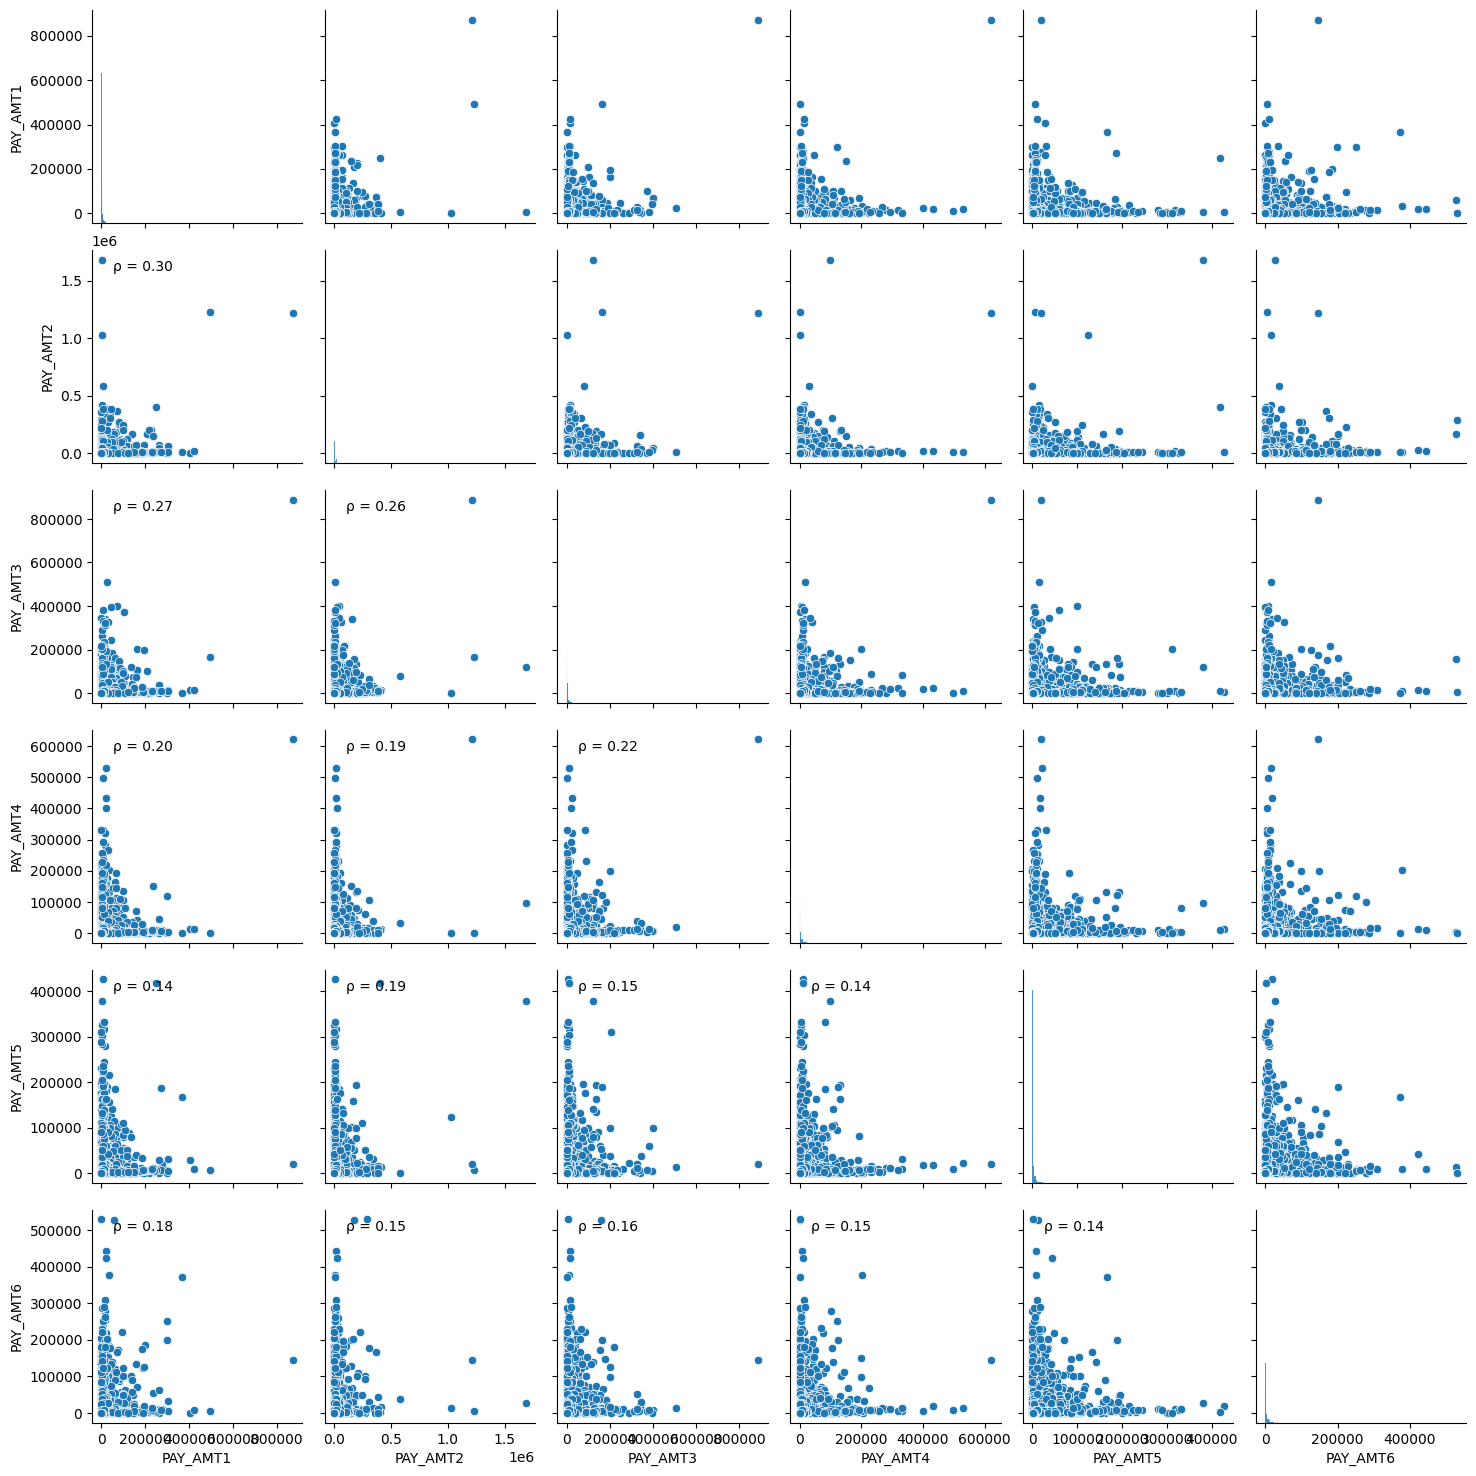

In [49]:
# Numerical variables analysis: PAY_AMT

def linear_corr(x, y, ax=None, **kws):
    # Plot correlation coefficient in the top left hand corner of a plot.
    r, _ = stats.pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

list_pay_amt_var = [i for i in df_train.columns if ('PAY_AMT' in i)]
g = sns.pairplot(df_train[list_pay_amt_var])
g.map_lower(linear_corr)

In [35]:
print('''
PAY_AMT numerical variables do not seems to have a consistent behaviour concerning payment delay when analysed alone. Maybe it can produce better results when mixed with other variables.
''')


PAY_AMT numerical variables do not seems to have a consistent behaviour concerning payment delay when analysed alone. Maybe it can produce better results when mixed with other variables.



c:\Users\Rafael\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


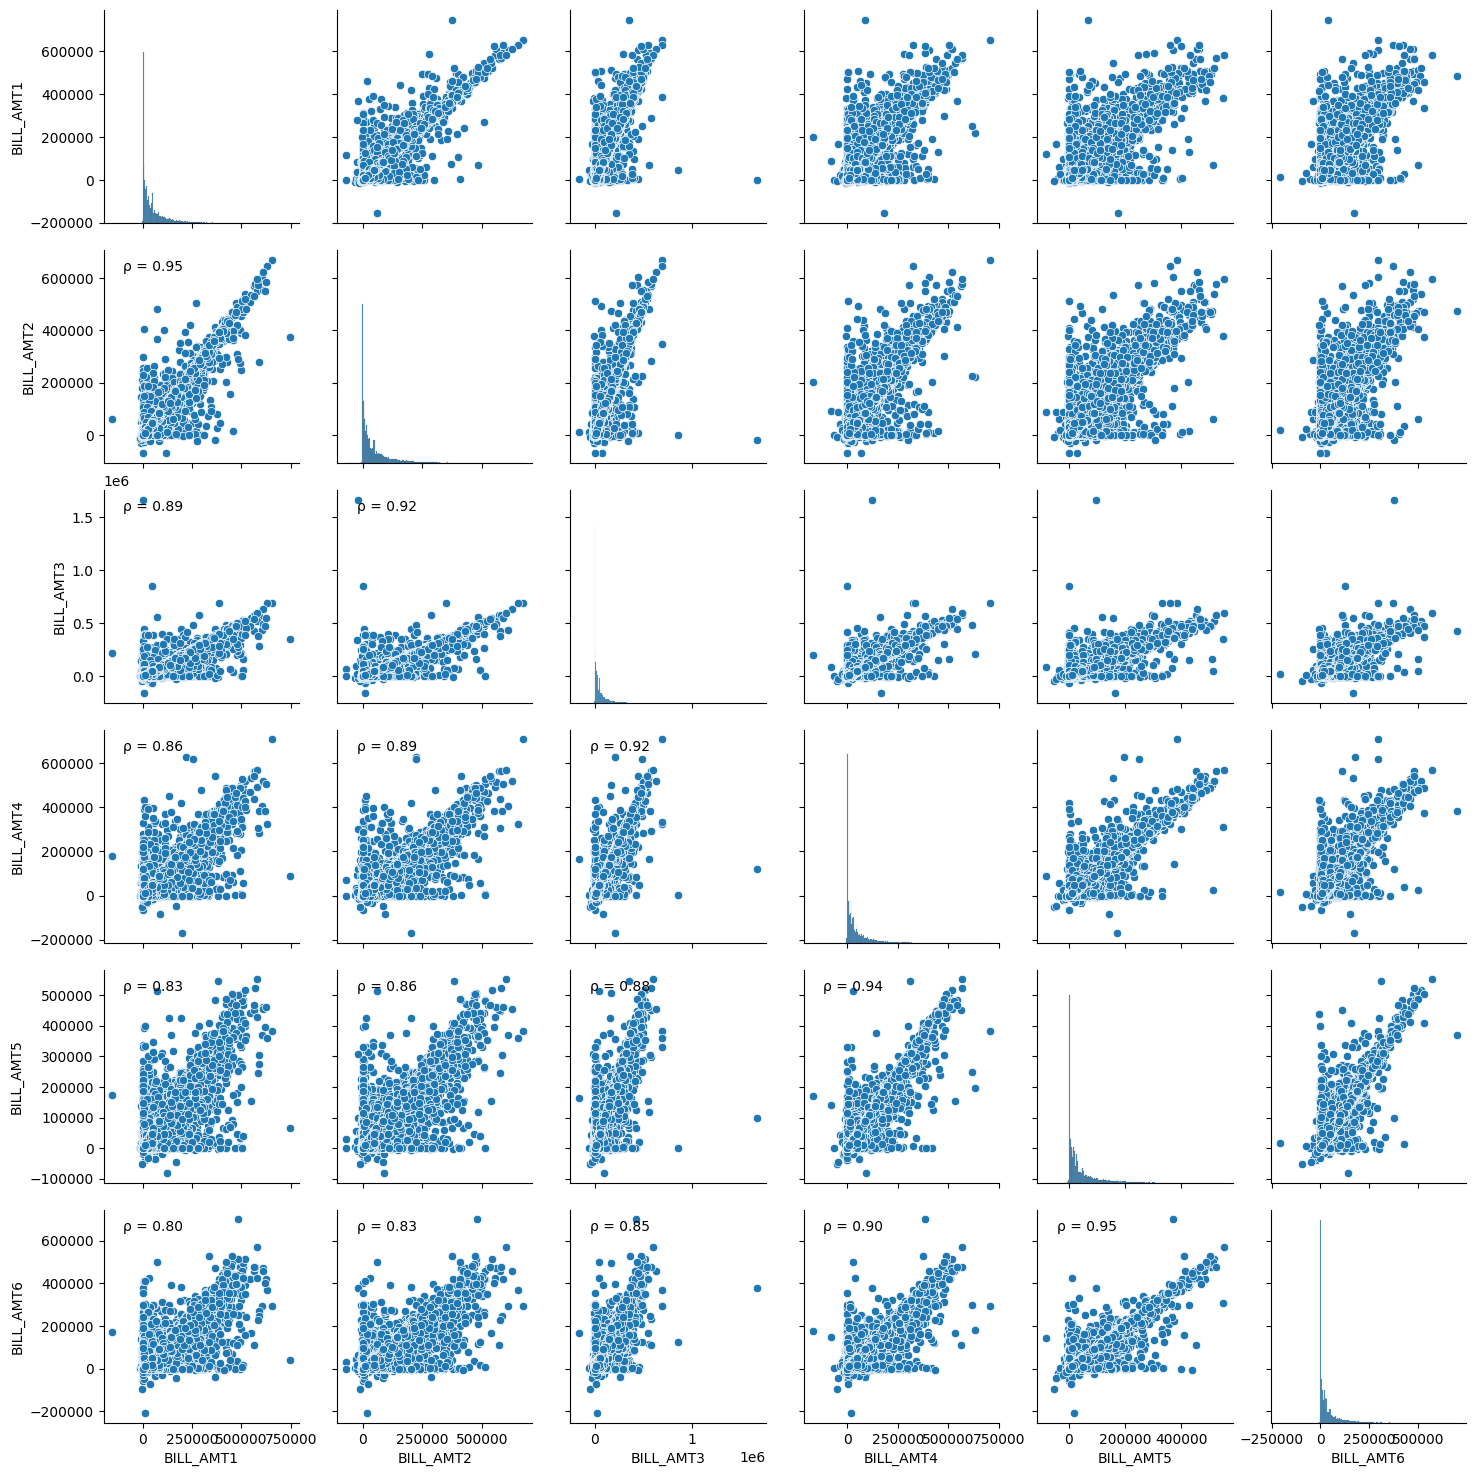

In [50]:
# Numerical variables analysis: BILL_AMT.
list_bill_amt_var = [i for i in df_train.columns if ('BILL' in i)]
g = sns.pairplot(df_train[list_bill_amt_var])
g.map_lower(linear_corr)

In [37]:
print('''
BILL_AMT appears to have a positive correlation with lagged versions of itself. It can be an indication that:
- Spending habits: people usually employ consistent credit habits instead of ocasional spending.
- Minimal payment: people tend to pay the minimum required and the residual charge accumulates to next month, which would explain why BILL_AMT tend to be more correlated between closer months.
''')


BILL_AMT appears to have a positive correlation with lagged versions of itself. It can be an indication that:
- Spending habits: people usually employ consistent credit habits instead of ocasional spending.
- Minimal payment: people tend to pay the minimum required and the residual charge accumulates to next month, which would explain why BILL_AMT tend to be more correlated between closer months.



In [38]:
# To understand how BILL_AMT and PAY_AMT relates.
print('Original structure: columns BILL_AMT and PAY_AMT seems to be disaligned.')
display(pd.DataFrame({
    'date': ['2005-09-01', '2005-08-01', '2005-07-01', '2005-06-01', '2005-05-01', '2005-04-01'],
    'BILL_AMT': df_train.loc[264, list_bill_amt_var].values,
    'PAY_AMT': df_train.loc[264, list_pay_amt_var].values,
    'PAY (status)': list(df_train.loc[264, list_pay_status])
}))

print('New interpretation: considering that PAY_AMT of item t will cover BILL_AMT of t-1, it makes more sense.')
display(pd.DataFrame({
    'date': ['2005-09-01', '2005-08-01', '2005-07-01', '2005-06-01', '2005-05-01', '2005-04-01', '2005-03-01 (past)'],
    'BILL_AMT': list(df_train.loc[264, list_bill_amt_var]) + [None],
    'PAY_AMT (adjusted)': [None] + list(df_train.loc[264, list_pay_amt_var]),
    'PAY (status)': [None] + list(df_train.loc[264, list_pay_status])
}))

print('Conclusion: PAY_AMT is comparable to BILL_AMT of previous month.')

Original structure: columns BILL_AMT and PAY_AMT seems to be disaligned.


,date,BILL_AMT,PAY_AMT,PAY (status)
0,2005-09-01,10115.0,258.0,-1.0
1,2005-08-01,249.0,5995.0,-1.0
2,2005-07-01,5986.0,188.0,-1.0
3,2005-06-01,188.0,1644.0,-1.0
4,2005-05-01,1644.0,16872.0,-1.0
5,2005-04-01,16872.0,4000.0,-1.0


New interpretation: considering that PAY_AMT of item t will cover BILL_AMT of t-1, it makes more sense.


,date,BILL_AMT,PAY_AMT (adjusted),PAY (status)
0,2005-09-01,10115.0,NaN,NaN
1,2005-08-01,249.0,258.0,-1.0
2,2005-07-01,5986.0,5995.0,-1.0
3,2005-06-01,188.0,188.0,-1.0
4,2005-05-01,1644.0,1644.0,-1.0
5,2005-04-01,16872.0,16872.0,-1.0
6,2005-03-01 (past),NaN,4000.0,-1.0


Conclusion: PAY_AMT is comparable to BILL_AMT of previous month.


In [39]:
# Get individual information about how much has been paid in reference to its debt.
def feat_eng_debt_capacity(df):

    df['debt_capacity_2'] = np.where(df['BILL_AMT2'] > 0, df['PAY_AMT1'] / df['BILL_AMT2'], None)
    df['debt_capacity_3'] = np.where(df['BILL_AMT3'] > 0, df['PAY_AMT2'] / df['BILL_AMT3'], None)
    df['debt_capacity_4'] = np.where(df['BILL_AMT4'] > 0, df['PAY_AMT3'] / df['BILL_AMT4'], None)
    df['debt_capacity_5'] = np.where(df['BILL_AMT5'] > 0, df['PAY_AMT4'] / df['BILL_AMT5'], None)
    df['debt_capacity_6'] = np.where(df['BILL_AMT6'] > 0, df['PAY_AMT5'] / df['BILL_AMT6'], None)

    list_var = [i for i in df.columns if 'debt_capacity' in i]
    df['debt_capacity'] = df[list_var].mean(axis=1)

    # obs: debt_capacity > 1 means that the person paid both loan value and interest.
    df['debt_capacity'] = np.where(df['debt_capacity'] > 1, 1, df['debt_capacity'])
    df['debt_capacity'] = df['debt_capacity'].fillna(1)
     
    df = df.drop(columns=['debt_capacity_2', 'debt_capacity_3', 'debt_capacity_4', 'debt_capacity_5', 'debt_capacity_6'])
    return df


df_train = feat_eng_debt_capacity(df_train)

In [40]:
# Cross information about BILL_AMT vs LIMIT_BAL.
def feat_eng_limit_usage(df):
    list_var = [i for i in df.columns if 'BILL' in i]

    #df['limit_usage'] = round(df[list_var].replace({0: np.nan}).mean(axis=1).fillna(0) / df['LIMIT_BAL'] * 100, 2)
    df['limit_usage'] = df[list_var].replace({0: np.nan}).mean(axis=1) / df['LIMIT_BAL']
    df['limit_usage'] = np.where(df['limit_usage'] < 0, 0, df['limit_usage'])
    df['limit_usage'] = df['limit_usage'].fillna(0)
    
    # If average bill is above credit limit.
    df['dummy_overlimit_usage'] = np.where(df['limit_usage'] > 1, 1, 0)

    df['limit_usage'] = np.where(df['limit_usage'] > 1, 1, df['limit_usage'])
    return df

df_train = feat_eng_limit_usage(df_train)

In [41]:
# A single test for the categorical feature recently created.
_, _ = categorical_variable_hypothesis_test(
    df=df_train,
    variable='dummy_overlimit_usage',
    target='default.payment.next.month',
    pvalue=0.05
    )

Priori test: variable dummy_overlimit_usage is relevant (p-value: 1.2569640400421024e-09).
Cramér V: 0.083 (weak)



In [42]:
# Create a methodology for exploring relevancy of numerical features vs category binary feature: mann whitney test + correlation ratio.
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
# source: https://en.wikipedia.org/wiki/Correlation_ratio

# Calculate the correlation ratio between a numerical var vs target
def correlation_ratio(df, variable, target):
    # It basically compare variance intragroups vs variance of whole sample.
    inner_var = 0
    for cat in df[target].unique():
        inner_var = inner_var + math.pow(df.loc[df[target] == cat, variable].mean() - df[variable].mean(), 2) * len(df.loc[df[target] == cat])
    
    outer_var = np.sum((df[variable] - df[variable].mean()) ** 2)
    
    corr = math.sqrt(inner_var / outer_var)

    if corr < 0.4:
        print(f'Correlation ratio: variable {variable} with weak correlation ({round(corr, 3)})')
    elif corr < 0.6:
        print(f'Correlation ratio: variable {variable} with moderate correlation ({round(corr, 3)})')
    elif corr < 0.8:
        print(f'Correlation ratio: variable {variable} with strong correlation ({round(corr, 3)})')
    else:
        print(f'Correlation ratio: variable {variable} with very strong correlation ({round(corr, 3)})')
    # obs: correlation interpretation based on https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html


def numerical_variable_hypothesis_test(df, variable, target, pvalue):
    
    # 
    obs1 = df.loc[df[target] == 1, variable]
    obs2 = df.loc[df[target] == 0, variable]

    _, p = stats.mannwhitneyu(obs1, obs2, alternative='two-sided')
    
    if p < pvalue:
        print(f'Reject H0: variable {variable} is relevant to target (p-value: {p})')
        correlation_ratio(df, variable, target)
    else:
        print(f'Non-reject H0: variable {variable} is not relevant to target (p-value: {p})')
        correlation_ratio(df, variable, target)
    print('')

'''
# Check.
numerical_variable_hypothesis_test(
    df=df_train,
    variable='debt_capacity',
    target='default.payment.next.month',
    pvalue=0.05)
'''

"\n# Check.\nnumerical_variable_hypothesis_test(\n    df=df_train,\n    variable='debt_capacity',\n    target='default.payment.next.month',\n    pvalue=0.05)\n"

In [43]:
# Numerical variables hypothesis test analysis.
list_num_var = [
    'LIMIT_BAL',
    'AGE',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3', 
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
    'debt_capacity',
    'limit_usage'
    ]

for i in list_num_var:
    numerical_variable_hypothesis_test(
        df=df_train,
        variable=i,
        target='default.payment.next.month',
        pvalue=0.05
        )

Reject H0: variable LIMIT_BAL is relevant to target (p-value: 1.5867924672995466e-144)
Correlation ratio: variable LIMIT_BAL with weak correlation (0.149)

Non-reject H0: variable AGE is not relevant to target (p-value: 0.48976472279941974)
Correlation ratio: variable AGE with weak correlation (0.013)



Reject H0: variable BILL_AMT1 is relevant to target (p-value: 3.9225510020730704e-05)
Correlation ratio: variable BILL_AMT1 with weak correlation (0.02)

Reject H0: variable BILL_AMT2 is relevant to target (p-value: 0.01662737824947407)
Correlation ratio: variable BILL_AMT2 with weak correlation (0.014)

Non-reject H0: variable BILL_AMT3 is not relevant to target (p-value: 0.05673837491687021)
Correlation ratio: variable BILL_AMT3 with weak correlation (0.013)

Non-reject H0: variable BILL_AMT4 is not relevant to target (p-value: 0.17001114144020857)
Correlation ratio: variable BILL_AMT4 with weak correlation (0.01)

Non-reject H0: variable BILL_AMT5 is not relevant to target (p-value: 0.18859195403011875)
Correlation ratio: variable BILL_AMT5 with weak correlation (0.006)

Non-reject H0: variable BILL_AMT6 is not relevant to target (p-value: 0.8443750222931115)
Correlation ratio: variable BILL_AMT6 with weak correlation (0.005)

Reject H0: variable PAY_AMT1 is relevant to target (p-va

### External variables

category,PAY,-2,-1,0,1,2,3,4,5,6,7,8,target=0,target=1,target=0 (%),target=1 (%),date
0,PAY_0,2210,4546,11781,2961,2118,260,59,19,9,8,17,18537,5451,77.28,22.72,2005-09-01
1,PAY_2,3028,4826,12581,20,3146,258,79,21,11,18,0,20435,3553,85.19,14.81,2005-08-01
2,PAY_3,3272,4748,12607,3,3031,200,66,17,21,21,2,20627,3361,85.99,14.01,2005-07-01
3,PAY_4,3459,4575,13113,2,2554,149,57,29,3,45,2,21147,2841,88.16,11.84,2005-06-01
4,PAY_5,3634,4433,13532,0,2113,139,75,13,2,46,1,21599,2389,90.04,9.96,2005-05-01
5,PAY_6,3925,4562,13022,0,2220,152,41,11,16,38,1,21509,2479,89.67,10.33,2005-04-01



A recent behavior of incresing delayness of payments has been noted in the training dataset. 
From april to september 2005 the percentage has increased 12,4 p.p. (from 10,3% to 22,7%).

Based on this results:
- Attention to recent behaviour: it may be worth to pay close attention users with recent delayness, since it may be a signal of future worsening cases.
- Structural events: the behavior is observed consistently in the entire training dataset during all months. It may be an evidence of a major event affecting the entire population. 



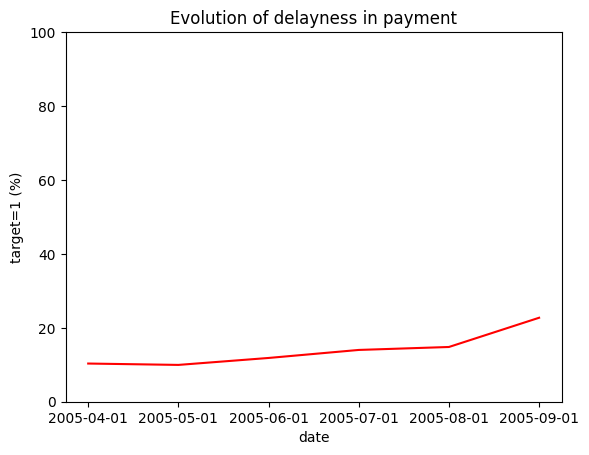

In [53]:
# How payment status evolve though time?
list_pay_status = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df_check = pd.melt(df_train, id_vars='ID', var_name='PAY', value_vars=list_pay_status, value_name='category')
df_check = pd.pivot_table(df_check, index='PAY', columns='category', values='ID', aggfunc='count', fill_value=0).reset_index()
df_check['target=0'] = df_check[[-2, -1, 0]].sum(axis=1)
df_check['target=1'] = df_check[list(range(1, 9))].sum(axis=1)
df_check['target=0 (%)'] = round(df_check['target=0'] / len(df_train) * 100, 2)
df_check['target=1 (%)'] = round(df_check['target=1'] / len(df_train) * 100, 2)
df_check['date'] = ['2005-09-01', '2005-08-01', '2005-07-01', '2005-06-01', '2005-05-01', '2005-04-01']
display(df_check)

fig = sns.lineplot(df_check.sort_values('date'), x='date', y='target=1 (%)', color='red')
fig.set(title='Evolution of delayness in payment', ylim=(0, 100))

print('''
A recent behavior of incresing delayness of payments has been noted in the training dataset. 
From april to september 2005 the percentage has increased 12,4 p.p. (from 10,3% to 22,7%).

Based on this results:
- Attention to recent behaviour: it may be worth to pay close attention users with recent delayness, since it may be a signal of future worsening cases.
- Structural events: the behavior is observed consistently in the entire training dataset during all months. It may be an evidence of a major event affecting the entire population. 
''')

In [61]:
# Uniemployment rate: https://eng.stat.gov.tw/Point.aspx?sid=t.3&n=4202&sms=11713
# Inflation rate (CPI): https://eng.stat.gov.tw/Point.aspx?sid=t.2&n=4201&sms=11713

df_econ = pd.DataFrame({
    'date': ['2005-04-01', '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01', '2005-09-01'],
    'interest_rate': [1.88, 1.88, 2, 2, 2, 2.13],
    'cpi': [83.93, 84.39, 84.66, 85.65, 86.28, 86.41],
    'unemployment': [0.0404, 0.041, 0.0422, 0.0432, 0.0436, 0.0414]
})
df_econ

,date,interest_rate,cpi,unemployment
0,2005-04-01,1.88,83.93,0.0404
1,2005-05-01,1.88,84.39,0.0410
2,2005-06-01,2.00,84.66,0.0422
3,2005-07-01,2.00,85.65,0.0432
4,2005-08-01,2.00,86.28,0.0436
5,2005-09-01,2.13,86.41,0.0414


## Learning

### General

**Dataset description**: 30000 rows with no missing value.
- `ID`: unique, therefore, there are no multiple loans.
- `LIMIT_BAL`: total amount of credit limit in local currency.

**Data source**: according to the original author, the dataset was extract from a single relevant bank in October 2005, filtering only credit card holders of the bank. There is, however, a divergence between original paper's and UCI dataset's metadata. While the original paper states 25.000 rows and 5529 (4,52%) cases of credit default, the UCI dataset displays 30.000 rows and 6636 (4,52%), suggesting an increase in rows respecting the original default proportion of 4,52%. It is not clear how other variables were affected.

**Local context**: in March 2005, Mainland China passed a [Anti-Secession Law](!https://en.wikipedia.org/wiki/Anti-Secession_Law), increasing chinese political grasp into Taiwan. It is not clear how relevant the event was on the dataset or even if the effect was equally distributed over time. 

**Categorical variables**: EDUCATION, SEX and MARRIAGE have relevant influency on target, in the same order of magnitude.

### Hypothesis


- if the bank have a specific economic class focus, it may have problems predicting credit default in other economic classes. For example, a bank specialized in low value loans may have a worse system for dealing with high value loans.

- Users who consistently pays a low percentage of the total debt are more propense to delay payments.

- Users who uses higher percentage of credit vs limit are more propense to delay payments.

- Users of different age groups have different probability of delay payments.

- Users with historical delays are more propense to future delay.

